<img src="house.jpg" alt="Alt Text" width="600" height="50" align="center">

# TASK 1
## Project Title: House Price Prediction
## Overview

#### In this project, we're diving into the realm of machine learning to predict house prices. Our aim is to develop a model that accurately estimates house prices based on features like square footage, bedrooms, and location.

###### We'll cover:

#### Data analysis to understand the dataset.
#### Creating useful features for the model.
#### Applying machine learning algorithms.
#### Evaluating the model's performance.
#### Gaining insights into factors influencing prices.

# Data Analysis Setup and Library Imports

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import sklearn as sk
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [5]:
df.shape

(13320, 9)

In [6]:
df1 = df.copy()

In [7]:
df1.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [8]:
df1["area_type"].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

## Calculating Correlation Matrix

In [9]:
cor = df1.corr()

In [10]:
cor

,bath,balcony,price
bath,1.000000,0.204201,0.456345
balcony,0.204201,1.000000,0.120355
price,0.456345,0.120355,1.000000


In [11]:
price_corr = cor['price'].sort_values(ascending=False)
print(price_corr)

price      1.000000
bath       0.456345
balcony    0.120355
Name: price, dtype: float64


# Vizualization

<AxesSubplot:>

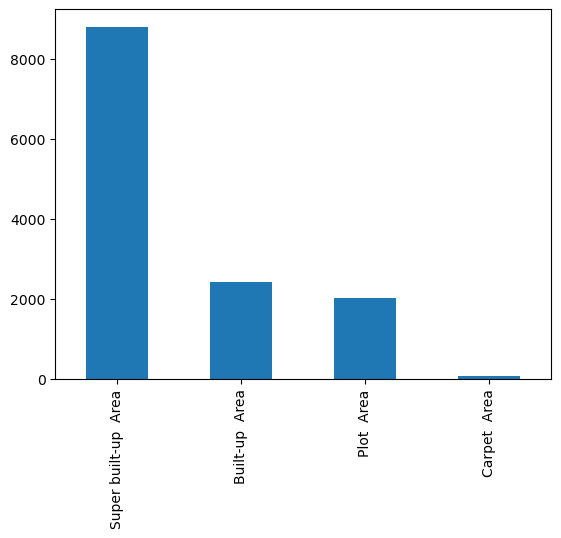

In [12]:
# Plot the bar chart
df1['area_type'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='area_type'>

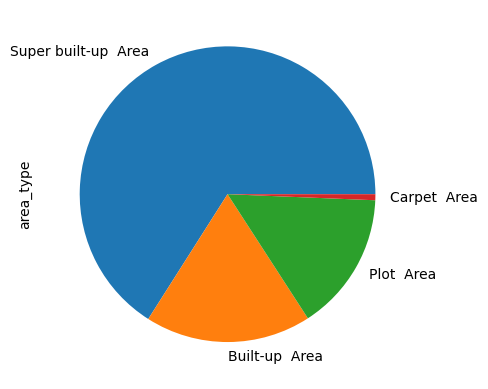

In [13]:
df1['area_type'].value_counts().plot(kind='pie')

In [14]:
df2 = df1.drop(["area_type","society","balcony","availability"],axis=1)
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


<AxesSubplot:>

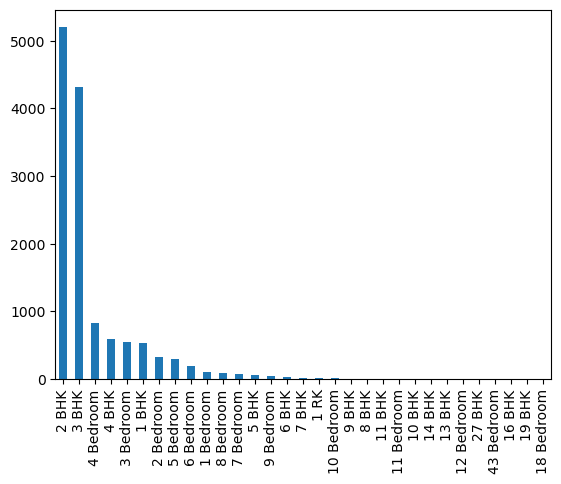

In [15]:
df1['size'].value_counts().plot(kind='bar')


# Data Cleaning and Handling Missing Values

In [20]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [21]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

# Feature Engineering

In [24]:
df3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [25]:
df3["bhk_size"] = df3["size"].apply(lambda x:int(x.split(" ")[0]))

In [26]:
df3.head()

,location,size,total_sqft,bath,price,bhk_size
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [27]:
df3["bhk_size"].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [28]:
 df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk_size    13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [29]:
df3["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

# Data Transformation: Total Square Foot

In [30]:
def convert_range_to_sqft(x):
    if '-' in x:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0]) + float(tokens[1]))/2
    try:
        return float(x)
    except:
        return np.nan

df3['total_sqft'] = df3['total_sqft'].apply(convert_range_to_sqft)

In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bhk_size    13246 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 724.4+ KB


In [32]:
df3["total_sqft"].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [33]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk_size              4
Name: 30, dtype: object

In [34]:
df4 = df3.copy()

# Calculating Price per Square Foot

In [35]:
df4["price_per_sqft"] = df4["price"]*100000/df4["total_sqft"]
df4.head()

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [36]:
len(df4["location"].unique())

1304

# Analyzing Property Locations

In [37]:
df4.location = df4.location.apply(lambda x:x.strip())
location_stat  = df4.groupby("location")["location"].agg("count").sort_values(ascending=False)
location_stat

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [38]:
len(location_stat[location_stat<=10])

1052

In [39]:
loc_less_10 = location_stat[location_stat<=10]
loc_less_10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [40]:
len(df4.location.unique())

1293

# Location Classification and Reduction

In [33]:
df4.location = df4.location.apply(lambda x: "other" if x in loc_less_10 else x)
len(df4.location.unique())

242

In [34]:
df4.head()

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [42]:
num_col = df4.select_dtypes(include=['float', 'int']).columns

In [37]:
df5 = df4.copy()

In [38]:
df5.describe()

,total_sqft,bath,price,bhk_size,price_per_sqft
count,13200.000000,13246.000000,13246.000000,13246.000000,1.320000e+04
mean,1555.302783,2.692586,112.389392,2.801902,7.920759e+03
std,1237.323445,1.341506,149.076587,1.295758,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267701e+03
50%,1275.000000,2.000000,72.000000,3.000000,5.438331e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [39]:
df4.shape

(13246, 7)

In [40]:
df5 = df4[~(df4.total_sqft/df4.bhk_size<300)]
df5.shape

(12502, 7)

In [41]:
df5.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

# Outlier Removal: Price per Square Foot

In [42]:
def remove_out(df):
    df_out =pd.DataFrame()
    for key,subdf in df.groupby("location"):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df= subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
        
    return df_out
    
    
df6 = remove_out(df5)
df6.shape

(10241, 7)

In [43]:
df6.describe()

,total_sqft,bath,price,bhk_size,price_per_sqft
count,10241.000000,10241.000000,10241.000000,10241.000000,10241.000000
mean,1503.877034,2.474075,90.982730,2.572210,5657.702572
std,876.716232,0.981338,86.147549,0.896219,2266.476980
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1108.000000,2.000000,49.000000,2.000000,4244.762955
50%,1282.000000,2.000000,67.000000,2.000000,5172.413793
75%,1650.000000,3.000000,100.000000,3.000000,6426.099852
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


# Visualizing Property Prices in Different Locations

In [44]:
def plot_scatter(df,location):
    bhk2 = df[(df.location==location)&(df.bhk_size==2)]
    bhk3 = df[(df.location==location)&(df.bhk_size==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqft,bhk2.price,color="blue",label="2 BHK",s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker="+",color="green",label="3 BHK",s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()


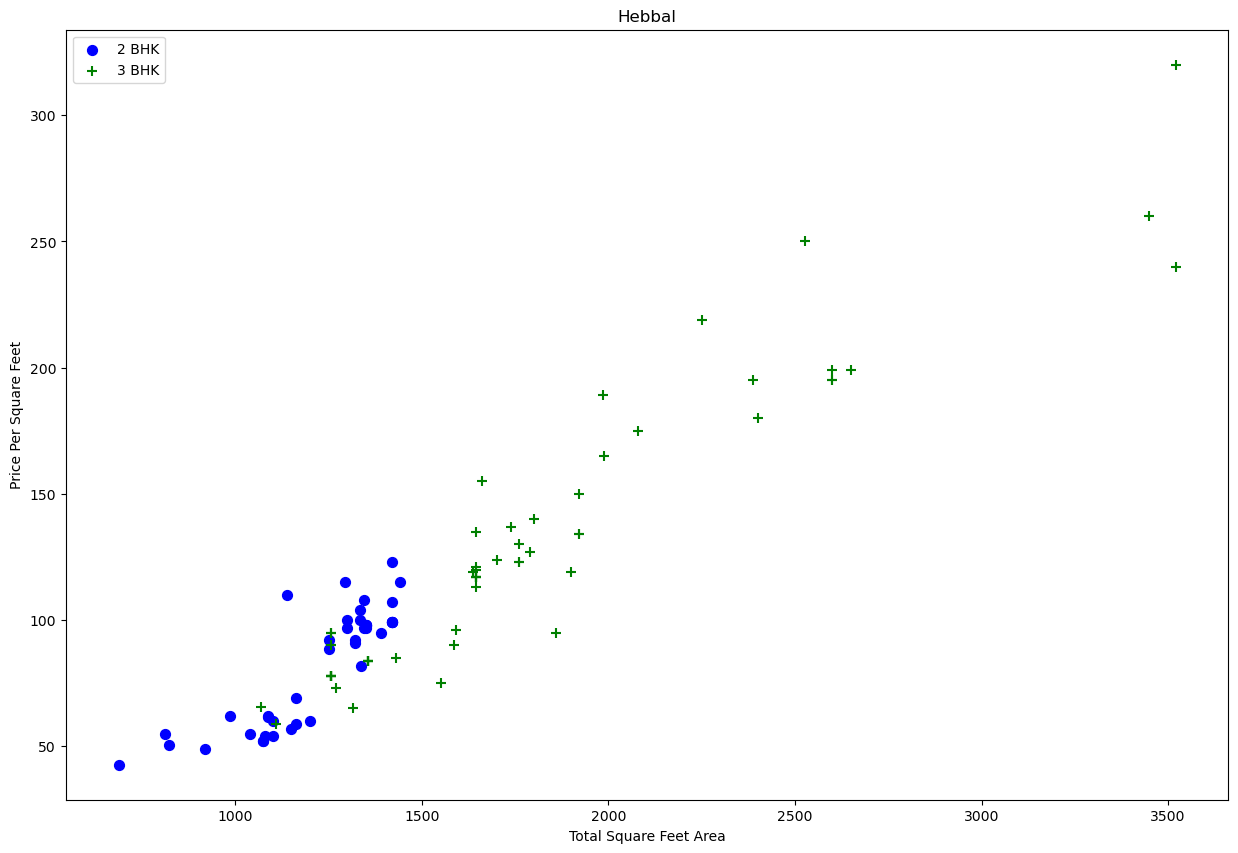

In [45]:
plot_scatter(df6,"Hebbal")

# BHK-Based Outlier Removal

In [46]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk_size'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')


In [47]:
df7 = remove_bhk_outliers(df6)
df7.shape

(7329, 7)

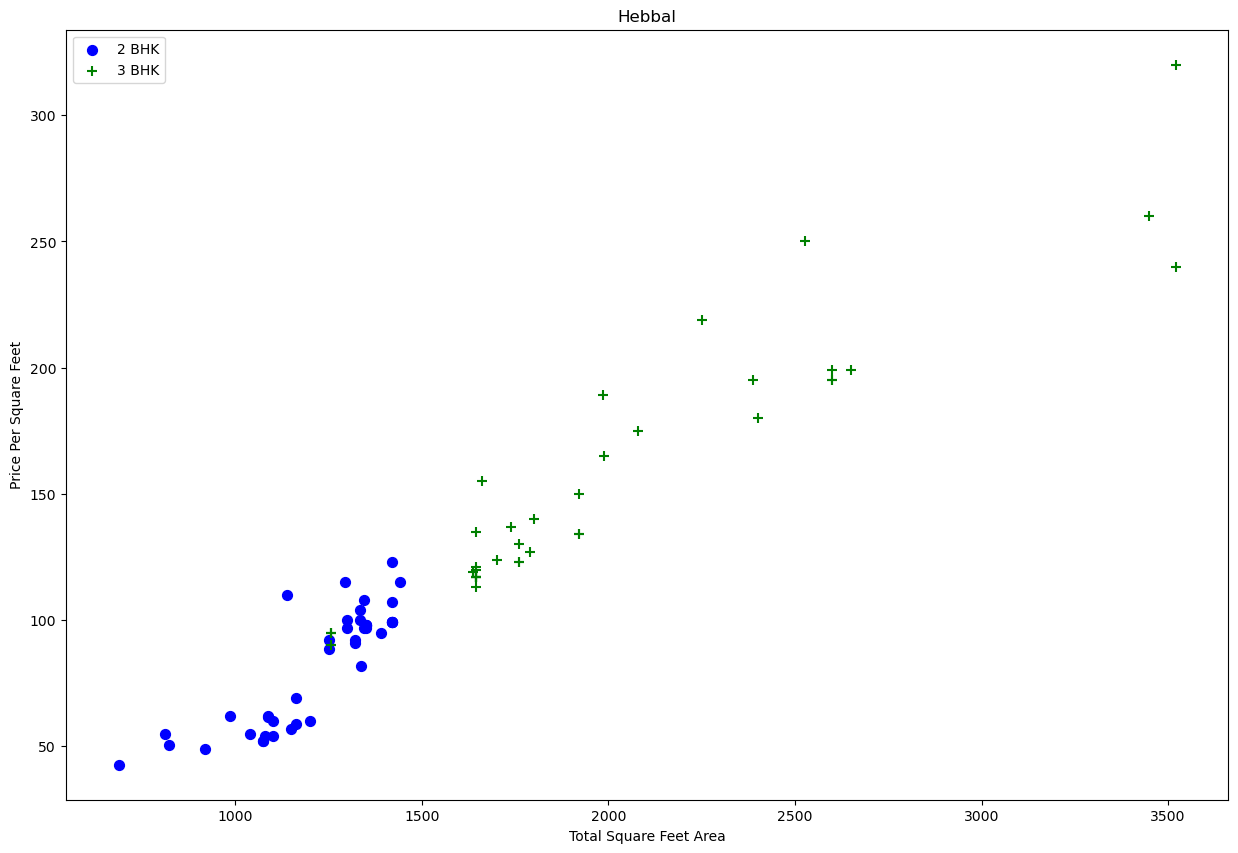

In [48]:
plot_scatter(df7,"Hebbal")

(array([ 548., 3591., 2300.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

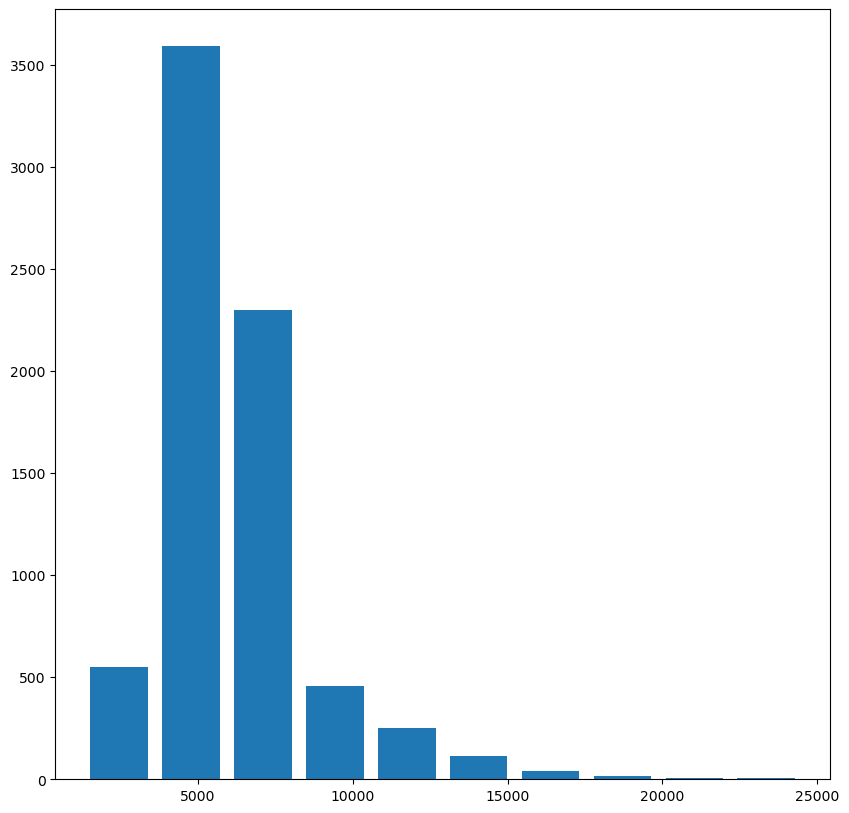

In [49]:
plt.figure(figsize=(10,10))
plt.hist(df7.price_per_sqft,rwidth=0.8)


In [50]:
df7.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [51]:
df7[df7.bath>10]


,location,size,total_sqft,bath,price,bhk_size,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


<AxesSubplot:xlabel='bath', ylabel='count'>

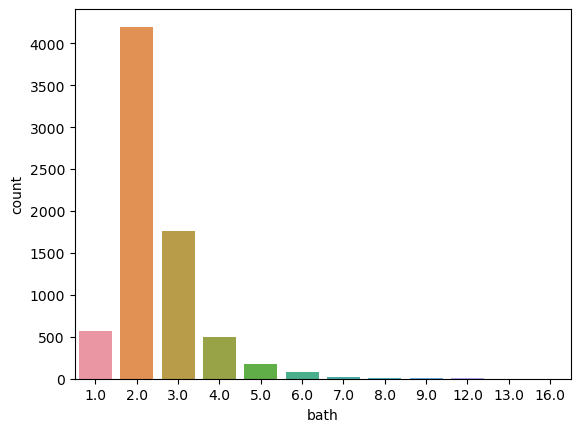

In [52]:
sns.countplot(x='bath', data=df7)

In [53]:
df7[df7.bath>df7.bhk_size+2]

,location,size,total_sqft,bath,price,bhk_size,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [54]:
df8 = df7[df7.bath<df7.bhk_size+2]
df8.shape

(7251, 7)

In [55]:
df9 = df8.drop(["size","price_per_sqft"],axis=1)
df9.head()

,location,total_sqft,bath,price,bhk_size
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [56]:
dum = pd.get_dummies(df9.location)
dum.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df10 = pd.concat([df9,dum.drop("other",axis=1)],axis=1)
df10.head()

,location,total_sqft,bath,price,bhk_size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df11 = df10.drop("location",axis=1)
df11.head()

,total_sqft,bath,price,bhk_size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df11.shape

(7251, 245)

In [60]:
x = df11.drop("price",axis=1)
y = df11["price"]

In [61]:
x.head()

,total_sqft,bath,bhk_size,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

# Data Splitting for Training and Testing

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [64]:
print(f"X Train Shape{x_train.shape}")
print(f"X Test Shape{x_test.shape}")
print(f"Y Train Shape{y_train.shape}")
print(f"Y Test Shape{y_test.shape}")

X Train Shape(5800, 244)
X Test Shape(1451, 244)
Y Train Shape(5800,)
Y Test Shape(1451,)


# Model Training

In [65]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)

0.8452277697874279

In [66]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)

cross_val_score(LinearRegression(),x,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [67]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import *

# Model Selection and Hyperparameter Tuning

In [69]:

models = {
    'Linear':{
        "Model": LinearRegression(),
        "params": {}
    },
    "KNN": {
        "Model": KNeighborsRegressor(),
        "params": {
            "n_neighbors":[1,5,10,15,20,25]
        }
    },
    'Ridge':{
        'Model': Ridge(),
        'params':{
            'alpha':[1, 10]
            }
    },
    'Lasso':{
        'Model': Lasso(),
        'params':{
            'alpha':[1, 10]            
        }
    },

    "Random Forest": {
        "Model": RandomForestRegressor(),
        "params": {
            "n_estimators": [50, 100, 150, 200],
            "max_depth": [5, 10, 15, 20],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4]
        }
    },
    'XGBoost': {
        'Model': XGBRegressor(),
        'params': {
            'learning_rate': [0.01, 0.1, 0.5, 1],
            'max_depth': [3, 5, 7, 10],
            'min_child_weight': [1, 3, 5],
            'subsample': [0.5, 0.7, 1],
            'n_estimators': [50, 100, 150, 200]
        }
    }
}


In [70]:
scores = []
for model_name, model_param in models.items():
    gs =  GridSearchCV(estimator=model_param['Model'],param_grid=model_param['params'],verbose=2, cv=5, return_train_score=True)
    gs.fit(x_train, y_train)
    scores.append({
        'model': model_name,
        'best_score': gs.best_score_,
        'best_params': gs.best_params_
    })

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.2s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=1; total time=   0.1s
[CV] END ......................................n_neighbors=5; total tim

[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.6s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   1.1s


[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   5.3s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=5, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   4.8s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.0s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.2s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   1.1s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=5, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   2.5s
[C

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   8.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   1.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   2.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   5.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   4.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   

[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50; total time=   1.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=150; tot

[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.1s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   2.2s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.7s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.3s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.5s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   4.4s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   6.5s
[CV] END max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time= 

[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=50; total time=   2.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.7s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   4.3s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   6.7s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   6.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time=   6.6s
[CV] END max_depth=15, min_samples_leaf=2, min_samples_split=5, n_estimators=150; total time

[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   4.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   4.4s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.0s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   4.9s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   6.2s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   6.2s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   6.3s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   6.4s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=150; total time=   6.1s
[CV] END max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=200;

[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   4.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   7.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   8.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   8.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   8.6s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   7.8s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   8.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=150; total time=   7.9s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   9.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total tim

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   4.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   7.7s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   7.3s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   6.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   6.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=150; total time=   7.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   9.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   8.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   9.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total tim

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsampl

[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1; total time=   3.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.7; tota

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   2.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   2.6s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.5; total

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   2.5s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1; total time=   2.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.5; tot

[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=1; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=1; total time=   3.0s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=1; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=1; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=150, subsample=1; total time=   2.9s
[CV] END learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.5; tot

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   6.3s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   6.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   6.1s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   6.7s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   5.9s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1; total time=   5.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1; total time=   5.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1; total time=   5.2s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1; t

[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   1.9s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   2.1s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   1.6s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=1; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=7, min_child_weight=5, n_estimators=50, subsample=1; total 

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   5.4s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   5.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   5.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   4.8s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.5s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.5s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   5.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=1, n_estimators=100,

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, subsample=1; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=100, subsample=1; total time=   3.7s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   6.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   6.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   6.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   8.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=150, subsample=0.5; total time=  11.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   7.1s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=3, n_estimators=150, sub

[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=150, subsample=1; total time=   7.0s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=150, subsample=1; total time=   6.4s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=150, subsample=1; total time=   7.6s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=150, subsample=1; total time=   6.7s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=150, subsample=1; total time=   6.4s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.5; total time=  10.7s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   9.4s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   9.4s
[CV] END learning_rate=0.01, max_depth=10, min_child_weight=5, n_estimators=200, subsample

[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=   2.6s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=   2.7s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   

[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.9s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=50, subsample=1; total time=   0.8s
[CV] END learning_rate=0.1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   1.6s
[

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   4.4s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.1s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1; total time=   1.9s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1; total time= 

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   4.4s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=1; total time=   3.3s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=1; total time=   3.1s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=1; total time=   2.8s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=3, n_estimators=150, subsample=1; total time

[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   4.9s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   4.8s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1; total time=   4.6s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1; total ti

[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   2.2s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   2.3s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   1.8s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   1.7s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=1; total time=   1.5s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=50, subsample=1; total time=   1

[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   3.4s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   3.9s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   3.6s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   3.5s
[CV] END learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=100, subsample=1; tota

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   5.9s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   6.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   6.9s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   6.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   6.2s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   5.9s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   5.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   6.6s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=150, subsampl

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=150, subsample=1; total time=   4.9s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=150, subsample=1; total time=   4.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   8.0s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   7.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   7.7s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   7.7s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   7.8s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   8.1s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=200, subsample=0.

[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1; total time=   6.3s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1; total time=   6.6s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1; total time=   6.4s
[CV] END learning_rate=0.1, max_depth=10, min_child_weight=5, n_estimators=200, subsample=1; total time=   6.5s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=1, n_estimators=50, subsample=0.5; total time=

[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=50, subsample=1; total time=   0.8s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   1.6s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   1.6

[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1; total time=   1.3s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   2.4s
[CV] END learning_rate=0.5, max_depth=3, min_child_weight=5, n_estimators=150, subsample=0.5; total time= 

[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   3.2s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=150, subsample=1; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=150, subsample=1; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=150, subsample=1; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=150, subsample=1; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=150, subsample=1; total time=   2.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   4.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.5; total time= 

[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   4.3s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   4.2s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   4.2s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1; total time=   3.6s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1; total time=   3.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1; total time=   3.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1; total time=   3.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1; total time=   3.7s
[CV] END learning_rate=0.5, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.5; total time=  

[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.5s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.4s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.2s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=1, n_estimators=50, subsample=1; total time=   1.2s
[C

[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   2.9s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   2.8s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1; total time=   2.4s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1; total time=   2.4s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1; total time=   2.3s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1; total time

[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   4.3s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   4.1s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   4.4s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=0.7; total time=   4.4s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=1; total time=   3.5s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=1; total time=   3.5s
[CV] END learning_rate=0.5, max_depth=7, min_child_weight=5, n_estimators=150, subsample=1; total ti

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   8.0s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   8.1s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.5; total time=   8.3s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   7.5s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   7.5s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   7.6s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   7.5s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   7.4s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=1, n_estimators=200, subsampl

[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   1.9s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.5; total time=   1.9s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   2.0s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   1.9s
[CV] END learning_rate=0.5, max_depth=10, min_child_weight=5, n_estimators=50, subsample=0.7; to

[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=50, subsample=1; total time=   0.7s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   1.6s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   1.5s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   1.6s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   1.6s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.5; total time=   1.6s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.5s
[CV] END learning_rate=1, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   1.5s
[CV] EN

[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1; total time=   1.3s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1; total time=   1.3s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   2.4s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   2.3s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   2.3s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   2.3s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.5; total time=   2.4s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   2.2s
[CV] END learning_rate=1, max_depth=3, min_child_weight=3, n_estimators=150, subsample=0.7; total time=   2.2s
[CV] 

[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=150, subsample=1; total time=   2.4s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=150, subsample=1; total time=   1.9s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   3.1s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   3.5s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   3.2s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   3.2s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.5; total time=   3.4s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   3.1s
[CV] END learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.7; total time=   3.0s
[CV] 

[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1; total time=   4.0s
[CV] END learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1; total time=   3.6s
[CV] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.5; total time=   1.1s
[CV] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   1.1s
[CV] END learning_rate=1, max_depth=5, min_child_weight=3, n_estimators=50, subsample=0.7; total time=   1.1s
[CV] END lea

[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=50, subsample=1; total time=   0.9s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=50, subsample=1; total time=   0.9s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   2.2s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   2.2s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   2.2s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   2.2s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.5; total time=   2.2s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   2.1s
[CV] END learning_rate=1, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   2.1s
[CV] EN

[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.4s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1; total time=   2.4s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   4.7s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   4.7s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   4.4s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   4.8s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=150, subsample=0.5; total time=   4.6s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   4.1s
[CV] END learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=150, subsample=0.7; total time=   4.3s
[CV] 

[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=150, subsample=1; total time=   3.7s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=150, subsample=1; total time=   3.6s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   5.8s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   5.9s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   6.7s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   5.9s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.5; total time=   5.8s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   5.5s
[CV] END learning_rate=1, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   5.6s
[CV] 

[CV] END learning_rate=1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1; total time=   4.7s
[CV] END learning_rate=1, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1; total time=   4.8s
[CV] END learning_rate=1, max_depth=10, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=1, max_depth=10, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=1, max_depth=10, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=1, max_depth=10, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   2.0s
[CV] END learning_rate=1, max_depth=10, min_child_weight=1, n_estimators=50, subsample=0.5; total time=   2.1s
[CV] END learning_rate=1, max_depth=10, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   2.0s
[CV] END learning_rate=1, max_depth=10, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   1.9s
[CV] 

[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=50, subsample=1; total time=   1.6s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=50, subsample=1; total time=   1.6s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=50, subsample=1; total time=   1.6s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   3.9s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   3.9s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   4.0s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   3.9s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.5; total time=   4.2s
[CV] END learning_rate=1, max_depth=10, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   3.8s
[

[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=100, subsample=1; total time=   3.3s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=100, subsample=1; total time=   3.3s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=100, subsample=1; total time=   3.2s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=100, subsample=1; total time=   3.2s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   5.9s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   5.8s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   5.7s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   5.9s
[CV] END learning_rate=1, max_depth=10, min_child_weight=5, n_estimators=150, subsample=0.5; total time=   5.8s


In [71]:
result = pd.DataFrame(scores,columns=['model','best_score','best_params'])
result

,model,best_score,best_params
0,Linear,0.832471,{}
1,KNN,0.664528,{'n_neighbors': 25}
2,Ridge,0.830957,{'alpha': 1}
3,Lasso,0.689078,{'alpha': 1}
4,Random Forest,0.793683,"{'max_depth': 20, 'min_samples_leaf': 1, 'min_..."
5,XGBoost,0.834919,"{'learning_rate': 0.5, 'max_depth': 3, 'min_ch..."


In [101]:
x.columns

Index(['total_sqft', 'bath', 'bhk_size', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [102]:
np.where(x.columns=="Uttarahalli")[0][0]

229

# Model Prediction

In [96]:
def  predict_price(location,sqft,bath,bhk_size):
    loc_index = np.where(x.columns==location)[0][0]
    
    a = np.zeros(len(x.columns))
    a[0]=sqft
    a[1]=bath
    a[2]=bhk_size
    if loc_index>=0:
        a[loc_index]=1
        
    return lr.predict([a])[0]

In [100]:
predict_price("1st Phase JP Nagar",1000,2,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677167738

In [103]:
import pickle
with open("house_price_pred_model.pickle","wb") as f:
    pickle.dump(lr,f)

In [104]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [105]:
x.columns

Index(['total_sqft', 'bath', 'bhk_size', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [106]:
locations=x.drop(['total_sqft', 'bath', 'bhk_size'],axis=1)

In [108]:
locations.columns

Index(['1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar', '6th Phase JP Nagar',
       '7th Phase JP Nagar', '8th Phase JP Nagar', '9th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=241)

In [109]:
result.best_params[5]

{'learning_rate': 0.5,
 'max_depth': 3,
 'min_child_weight': 1,
 'n_estimators': 200,
 'subsample': 1}

In [112]:
xgb_model = XGBRegressor(learning_rate= 0.5,
 max_depth=3,
 min_child_weight=1,
 n_estimators=200,
 subsample=1)

In [113]:
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=200, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [114]:
xgb_model.score(x_train,y_train)

0.9463859954604076

In [115]:
xgb_model.score(x_test,y_test)

0.848239981467487

# Save Model

In [116]:
import pickle
with open("house_price_pred_xgb_model.pickle","wb") as f:
    pickle.dump(xgb_model,f)